In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PREPROCESSING
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# MODEL
from sklearn.tree import DecisionTreeClassifier

# EVALUASI
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## **LOAD DATASET**

In [2]:
url = "https://drive.google.com/file/d/1Gv8eTT-GF3icxIzkG7WZOdg7UmPDIKZw/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [3]:
obesitas_df = pd.read_csv(path)
obesitas_df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## **PREPROCESSING DATA**

In [4]:
obesitas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

### **Data Cleaning**

In [5]:
# mengecek ukuran, nilai null, dan nilai duplicated pada dataset
print(f"Jumlah Data: {obesitas_df.shape[0]}")
print(f"Jumlah Nilai Null: {obesitas_df.isnull().sum().sum()}")
print(f"Jumlah Nilai Duplicated: {obesitas_df.duplicated().sum()}")

Jumlah Data: 2111
Jumlah Nilai Null: 0
Jumlah Nilai Duplicated: 24


In [6]:
# membuan data duplikat
obesitas_df.drop_duplicates(inplace=True)
print(f"Jumlah Nilai Duplicated: {obesitas_df.duplicated().sum()}")

Jumlah Nilai Duplicated: 0


In [7]:
# membuat list yang masing masing berisi data kategorik dan numerik
categorical_features = obesitas_df.select_dtypes(include=["object"]).columns.to_list()
numerical_features = obesitas_df.select_dtypes(exclude=["object"]).columns.to_list()

print(f"Jumlah Kolom Numerik: {len(numerical_features)}")
print(f"Kolom: {numerical_features}\n")
print(f"Jumlah Kolom Kategorik: {len(categorical_features)}")
print(f"Kolom: {categorical_features}")

Jumlah Kolom Numerik: 8
Kolom: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Jumlah Kolom Kategorik: 9
Kolom: ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Obesity']


In [8]:
# melihat nilai uniq pada semua kolom kategorik
for feature in categorical_features:
    print(f"Nilai Unik pada kolom {feature}: {obesitas_df[feature].unique()}")

Nilai Unik pada kolom Gender: ['Female' 'Male']
Nilai Unik pada kolom family_history: ['yes' 'no']
Nilai Unik pada kolom FAVC: ['no' 'yes']
Nilai Unik pada kolom CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
Nilai Unik pada kolom SMOKE: ['no' 'yes']
Nilai Unik pada kolom SCC: ['no' 'yes']
Nilai Unik pada kolom CALC: ['no' 'Sometimes' 'Frequently' 'Always']
Nilai Unik pada kolom MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Nilai Unik pada kolom Obesity: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


### **ENCODE KOLOM KATEGORIK**

In [9]:
# encode (merubah kolom kategorikal menjadi numerikal dengan menggunakan LabelEncoder)
le = LabelEncoder()
for feature in categorical_features:
    obesitas_df[feature] = le.fit_transform(obesitas_df[feature])
    print(f"Label Encoder {feature}: {le.classes_}")

Label Encoder Gender: ['Female' 'Male']
Label Encoder family_history: ['no' 'yes']
Label Encoder FAVC: ['no' 'yes']
Label Encoder CAEC: ['Always' 'Frequently' 'Sometimes' 'no']
Label Encoder SMOKE: ['no' 'yes']
Label Encoder SCC: ['no' 'yes']
Label Encoder CALC: ['Always' 'Frequently' 'Sometimes' 'no']
Label Encoder MTRANS: ['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']
Label Encoder Obesity: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [10]:
# melihat nilai unique pada kolom kategorik setelah di encode
for feature in categorical_features:
    print(f"Nilai Unik pada kolom {feature}: {obesitas_df[feature].unique()}")

Nilai Unik pada kolom Gender: [0 1]
Nilai Unik pada kolom family_history: [1 0]
Nilai Unik pada kolom FAVC: [0 1]
Nilai Unik pada kolom CAEC: [2 1 0 3]
Nilai Unik pada kolom SMOKE: [0 1]
Nilai Unik pada kolom SCC: [0 1]
Nilai Unik pada kolom CALC: [3 2 1 0]
Nilai Unik pada kolom MTRANS: [3 4 0 2 1]
Nilai Unik pada kolom Obesity: [1 5 6 2 0 3 4]


### **TRANSFORM DATA NUMERIC**

In [11]:
# standarisasi fitur
scaler = StandardScaler()
obesitas_df[numerical_features] = scaler.fit_transform(obesitas_df[numerical_features])
obesitas_df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,-0.526613,-0.887408,-0.872985,1,0,-0.788364,0.390906,2,0,-0.007810,0,-1.186977,0.554211,3,3,1
1,0,-0.526613,-1.960788,-1.178508,1,0,1.082164,0.390906,2,1,1.636552,1,2.328908,-1.090505,2,3,1
2,1,-0.212507,1.044677,-0.376509,1,0,-0.788364,0.390906,2,0,-0.007810,0,1.156947,0.554211,1,3,1
3,1,0.415705,1.044677,0.005395,0,0,1.082164,0.390906,2,0,-0.007810,0,1.156947,-1.090505,1,4,5
4,1,-0.369560,0.830001,0.112328,0,0,-0.788364,-2.225418,2,0,-0.007810,0,-1.186977,-1.090505,2,3,6


## **EXPLORATORY DATA ANALYSIS**

Text(0.5, 0, 'umur')

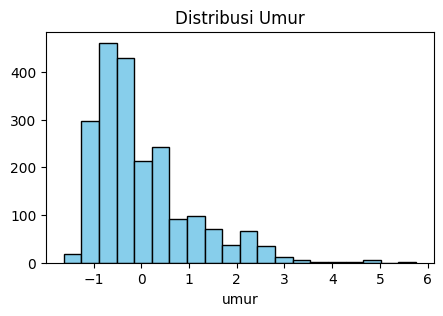

In [12]:
# histogram age
plt.figure(figsize=(5, 3))
plt.hist(obesitas_df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Umur')
plt.xlabel('umur')

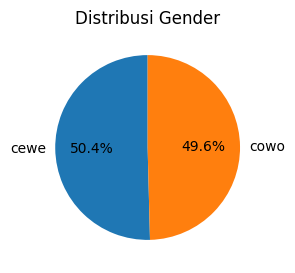

In [13]:
# distribusi gender pie chart
gender_counts = obesitas_df['Gender'].value_counts()
plt.figure(figsize=(5, 3))
plt.pie(gender_counts, labels=['cewe', 'cowo'], autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Gender')
plt.show()

### **FEATURE SELECTION**

In [14]:
# mengecek informasi dataset
obesitas_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2087 non-null   int64  
 1   Age             2087 non-null   float64
 2   Height          2087 non-null   float64
 3   Weight          2087 non-null   float64
 4   family_history  2087 non-null   int64  
 5   FAVC            2087 non-null   int64  
 6   FCVC            2087 non-null   float64
 7   NCP             2087 non-null   float64
 8   CAEC            2087 non-null   int64  
 9   SMOKE           2087 non-null   int64  
 10  CH2O            2087 non-null   float64
 11  SCC             2087 non-null   int64  
 12  FAF             2087 non-null   float64
 13  TUE             2087 non-null   float64
 14  CALC            2087 non-null   int64  
 15  MTRANS          2087 non-null   int64  
 16  Obesity         2087 non-null   int64  
dtypes: float64(8), int64(9)
memory usage: 

In [15]:
# menentukan kolom target dan feature
X = obesitas_df.drop('Obesity', axis=1)
y = obesitas_df['Obesity']

# Pilih k fitur terbaik
selector = SelectKBest(score_func=f_classif, k=14)
selector.fit(X, y)

# Tampilkan skor setiap fitur
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print("Skor setiap fitur:")
print(scores)

# Pilih fitur terbaik
selected_features = X.columns[selector.get_support()].tolist()
print("\nFitur terbaik:")
print(selected_features)

Skor setiap fitur:
           Feature        Score
3           Weight  1926.517611
0           Gender   159.433043
4   family_history   145.743832
6             FCVC   110.454307
8             CAEC    77.546005
1              Age    76.195373
5             FAVC    43.204572
2           Height    37.437653
14            CALC    33.513167
15          MTRANS    27.182901
7              NCP    26.774811
11             SCC    22.656834
12             FAF    18.176809
10            CH2O    15.187240
13             TUE     7.934931
9            SMOKE     5.373328

Fitur terbaik:
['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'CALC', 'MTRANS']


In [16]:
# UPDATE X
X = obesitas_df[selected_features]
y = obesitas_df['Obesity']

### **Handling Imbalanced Data**

In [17]:
# Tampilkan distribusi sebelum SMOTE
print("Distribusi kelas sebelum SMOTE:")
print(y.value_counts())

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Tampilkan distribusi setelah SMOTE
print("\nDistribusi kelas setelah SMOTE:")
print(pd.Series(y_balanced).value_counts())

Distribusi kelas sebelum SMOTE:
Obesity
2    351
4    324
3    297
6    290
1    282
5    276
0    267
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
Obesity
1    351
5    351
6    351
2    351
0    351
3    351
4    351
Name: count, dtype: int64


In [18]:
print(f"Banyaknya data setelah oversampling : {obesitas_df.shape[0]}")

Banyaknya data setelah oversampling : 2087


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced,
    y_balanced,
    test_size=0.2,
    random_state=42,
    stratify=y_balanced
)

print(f"Jumlah Data Latih: {len(X_train)}")
print(f"Jumlah Data Uji: {len(X_test)}")

Jumlah Data Latih: 1965
Jumlah Data Uji: 492


## **MODELING**

In [20]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

## **EVALUASI MODEL**

In [21]:
y_pred = decision_tree_model.predict(X_test)
print(f"Akurasi:{ accuracy_score(y_test, y_pred) : .2f}")

Akurasi: 0.94


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.93      0.91      0.92        70
           2       0.95      0.99      0.97        70
           3       0.99      0.97      0.98        71
           4       0.99      1.00      0.99        70
           5       0.82      0.93      0.87        70
           6       0.95      0.80      0.87        71

    accuracy                           0.94       492
   macro avg       0.94      0.94      0.94       492
weighted avg       0.94      0.94      0.94       492



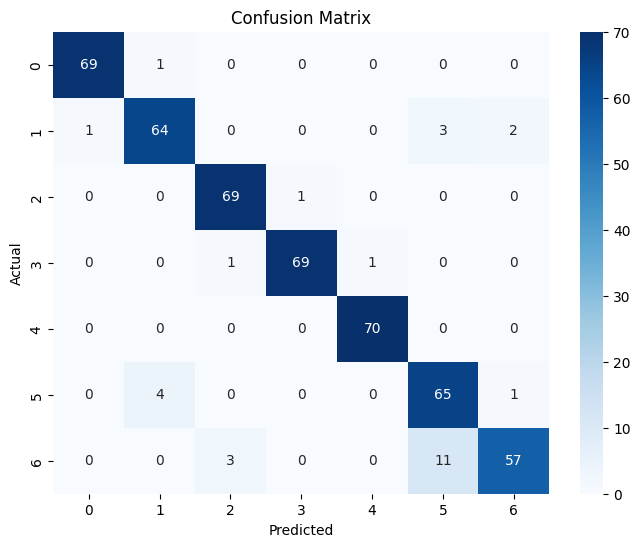

In [23]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **EXPORT MODEL dan SCALLER**

In [24]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(decision_tree_model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)